# Polynomial Regression

This repository demonstrates the concept and implementation of **Polynomial Regression**, which is used to model relationships between independent and dependent variables in a non-linear manner. Polynomial regression is an extension of linear regression, where the relationship is modeled as an nth-degree polynomial.


### Import the packages


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Load the data


In [5]:
df = pd.read_csv("../../data/FuelConsumption.csv")

# display the first few columns of the dataset
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



## Understand the Data

### `FuelConsumption.csv`:
**`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


Let's select some features that we want to use for regression.


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


# Visualizations

Plotting __ENGINESIZE__ vs Emissions 

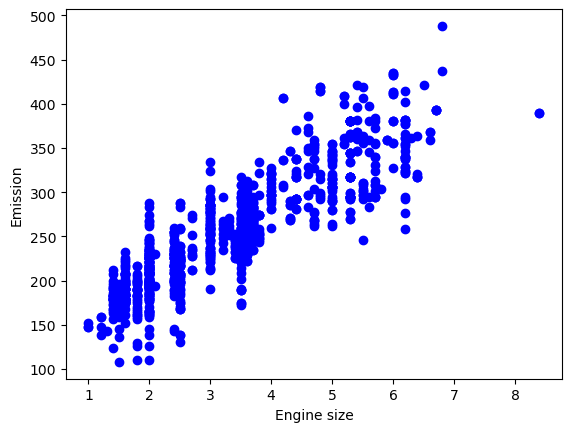

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Train and Test Dataset Split

When building a machine learning model, it is important to evaluate how well it performs on new, unseen data. Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. To do this, we split our dataset into two parts:

**Training Set**: Used to train the model.

**Testing Set**: Used to test how well the model performs on data it has not seen before.

By doing this split, we get a better understanding of how well the model generalizes to new data, as the testing set acts like "new" data that the model has never encountered during training (**out-of-sample accuracy**). This helps us measure the model’s accuracy and reliability.

For example, we can split our dataset so that 80% is used for training and 20% is used for testing. To do this, we use a simple method to randomly select rows for each set. One common approach is to use the __np.random.rand()__ function from the NumPy library to create a random mask for splitting the data.

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Polynomial Regression

Sometimes, the data doesn't follow a straight line and looks more like a curve. In such cases, we can use **Polynomial Regression** to fit the data better. There are many types of polynomial regression, such as quadratic (degree 2), cubic (degree 3), and so on. The degree can even go to infinity.

In polynomial regression, we model the relationship between the input variable \( x \) (independent variable) and the output variable \( y \) (dependent variable) as a polynomial of degree \( n \). For example, for a degree 2 polynomial, the equation looks like this:

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how do we fit our data to this equation when we only have \( x \) values, like **Engine Size**?

The answer is to create some new features. For example, we can use:
- 1 (a constant),
- ($x$) (the original feature), and
- ($x^2$) (the square of the original feature).

__PolynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   


$$
\begin{bmatrix}
    v_1\\\\\\
    v_2\\\\
    \vdots\\\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\\\
    [ 1 & v_2 & v_2^2]\\\\
    \vdots & \vdots & \vdots\\\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$




$$
\begin{bmatrix}
    2.\\\\
    2.4\\\\
    1.5\\\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\\\
    [ 1 & 2.4 & 5.76]\\\\
    [ 1 & 1.5 & 2.25]\\\\
    \vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$







It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems. 



so we can use __LinearRegression()__ function to solve it:


In [11]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.28179403 -1.33342478]]
Intercept:  [108.61655234]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


Text(0, 0.5, 'Emission')

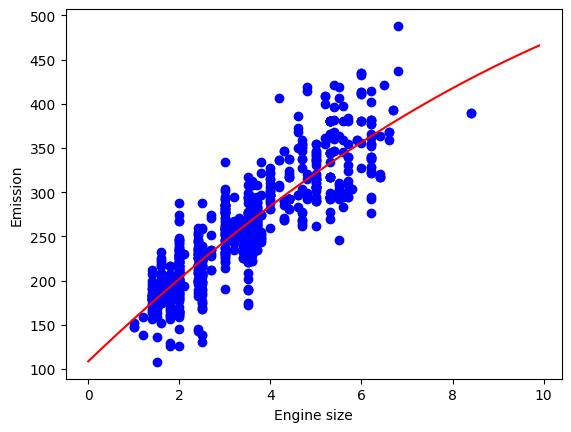

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [13]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 24.74
Residual sum of squares (MSE): 1085.31
R2-score: 0.72
